In [1]:
# import requests
# from sklearn.preprocessing import OneHotEncoder
# from PIL import Image

import pandas as pd # <---------------------  ???
import numpy as np
import json
import pickle
from sklearn.model_selection import train_test_split

# from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Create a Data Generator: Use a data generator to create batches of images. Libraries like Keras provide ImageDataGenerator which can help in generating batches of tensor image data with real-time data augmentation.
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# M19D03A04 - Branching
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Label Processing -----------------------------------------------------------

In [3]:
# '/content/drive/My Drive/MyFolder/example.txt
file_path = "/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/data.json"
# with open(file_path, 'r') as file:
#     content = file.read()
# print(content)

label_df = pd.read_json(file_path)
label_df.head()

,iskZwzri42zg0vdZGVRJYIP25svQgQLc.jpeg,l01Y3euvXnrq1XdlpA8oBVRc3uaXDKVo.jpeg,KMM0R4UV5leP51apLk4VNkLJMrudWdF1.jpeg,F5kYoFuD0w88FYkDApvbbiGOpyR69PQw.jpeg,NFeeVgmHsZbgkSq3FlJFYMSaTSLiMhUw.jpeg,5mdgorNesH9ZybvLbtjhlXBakAm2dpvB.jpeg,W95Jhi7UeOCqwlQtvGDQhegJM1h4fPLw.jpeg,t6yX4HtKEm5MMhVHj8VmI2xnzdp3rUxk.jpeg,IhGUqfOpx9UD3s6I9P7U93R0cD9rWgBr.jpeg,lF5wnO2qAOKJ95m65qw7pznkZWIbYQBi.jpeg,...,T7PKdIYOAzVxm5YaOOLFhLGS0w12DMt5.jpeg,3vBnrxe2C6M3c3LnWT2yLBr2XDj9fwtg.jpeg,R0VXeX9gLm78mYj7Bknn5MDGOxv4tydi.jpeg,rjfDRiMPWIbjercVUYTsTirSe1sKn18i.jpeg,2E5FJownJafIuHDFGxux1D8Y83oRfRVU.jpeg,h7irQxEhz7BEiTGHl0cwy6ljAiPfzRgP.jpeg,BUTtPhuCDkn432TeM8Vfqa4QDhyx6CmJ.jpeg,ZGUA188q8Ny2nvHH2IFm9zQJupa4BUlN.jpeg,NaRmFKGwxGw7fi6e9xq5B3OBTCTqLPrL.jpeg,o5f84gCr2YTmmpw2C4xzDjYzTxSj3MoJ.jpeg
cooling,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
pollen,False,True,True,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
varroa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
wasps,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
label_df_02 = label_df.transpose()
label_df_02 = label_df_02.reset_index(names=["file_name"])
label_df_02.head()

,file_name,cooling,pollen,varroa,wasps
0,iskZwzri42zg0vdZGVRJYIP25svQgQLc.jpeg,False,False,False,True
1,l01Y3euvXnrq1XdlpA8oBVRc3uaXDKVo.jpeg,False,True,False,False
2,KMM0R4UV5leP51apLk4VNkLJMrudWdF1.jpeg,False,True,False,False
3,F5kYoFuD0w88FYkDApvbbiGOpyR69PQw.jpeg,False,False,False,False
4,NFeeVgmHsZbgkSq3FlJFYMSaTSLiMhUw.jpeg,False,True,False,False


In [5]:
label_df_03 = label_df_02.replace({False: 0, True: 1})
label_df_03.head()


<ipython-input-5-49a5b1a59628>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label_df_03 = label_df_02.replace({False: 0, True: 1})


,file_name,cooling,pollen,varroa,wasps
0,iskZwzri42zg0vdZGVRJYIP25svQgQLc.jpeg,0,0,0,1
1,l01Y3euvXnrq1XdlpA8oBVRc3uaXDKVo.jpeg,0,1,0,0
2,KMM0R4UV5leP51apLk4VNkLJMrudWdF1.jpeg,0,1,0,0
3,F5kYoFuD0w88FYkDApvbbiGOpyR69PQw.jpeg,0,0,0,0
4,NFeeVgmHsZbgkSq3FlJFYMSaTSLiMhUw.jpeg,0,1,0,0


In [6]:
# Combine the existing colums into a single multi-out colume
# NOTE - The operation below requires this to be a tuple // Convert it here
label_df_03['multi_labels'] = label_df_03[['cooling', 'pollen', 'varroa', 'wasps']].apply(lambda row: tuple(row.astype(int)), axis=1)


label_df_03.head()


,file_name,cooling,pollen,varroa,wasps,multi_labels
0,iskZwzri42zg0vdZGVRJYIP25svQgQLc.jpeg,0,0,0,1,"(0, 0, 0, 1)"
1,l01Y3euvXnrq1XdlpA8oBVRc3uaXDKVo.jpeg,0,1,0,0,"(0, 1, 0, 0)"
2,KMM0R4UV5leP51apLk4VNkLJMrudWdF1.jpeg,0,1,0,0,"(0, 1, 0, 0)"
3,F5kYoFuD0w88FYkDApvbbiGOpyR69PQw.jpeg,0,0,0,0,"(0, 0, 0, 0)"
4,NFeeVgmHsZbgkSq3FlJFYMSaTSLiMhUw.jpeg,0,1,0,0,"(0, 1, 0, 0)"


In [7]:
train_df, test_df = train_test_split(label_df_03, test_size=0.2, random_state=23)

print(len(train_df))
print(len(test_df))

5992
1498


# Batch Processing image data --------------------------------

In [ ]:
# !pip install --upgrade tensorflow keras

In [16]:
# Create a generator for training data // There is a data mismatch bettween the TF and numpy array → This will convert it
def generator_wrapper(generator):
    """Restructures labels into a dictionary."""
    for x, y in generator:
        labels = {
            'cooling': y[:, 0],  # Assuming 'cooling' is the first column in y
            'pollen': y[:, 1],   # Assuming 'pollen' is the second column in y
            'varroa': y[:, 2],   # ... and so on
            'wasps': y[:, 3]    # ...
        }
        yield (x, labels)

In [ ]:
### ========> Multi_output requires the output field to be a list
###           but the output has to be a TF object (not a list)
###           Gemini keeps looping, list → dict → list
###             output type requiremetn coming flow_from_dataframe()
###
###  Option - Change away from flow_from_dataframe()
###  Option - resolve
###  Option - Switch multio out to raw, and the Y_col to the joined list
###  Req - ImageDataGenerator.flow_from_dataframe → creates a generator of batches of image data as NumPy arrays
###  Req - model.fit. requires numpy arrays, TF datasets, or a generator that yields MumPy arrays (NOT function)
###  Req - The function converst NumPy to TF Tensor // yield → returns the tensors so model.fit() can read them

### ======== Optimization =====================
### At e10, relu activator, the varroa accuracy @ 0.9551                                                             ↓↓↓↓↓↓
### At e10, sigmoid activator → cooling_accuracy: 0.9844 - loss: 0.5826 - pollen_accuracy: 0.9523 - varroa_accuracy: 0.9159 - wasps_accuracy: 0.9997
### At e10, relu activator, verroa Sense Layer (128→198 (+150%)) →  - cooling_accuracy: 0.9915 - loss: 0.5422 - pollen_accuracy: 0.9727 - varroa_accuracy: 0.9444 - wasps_accuracy: 0.9968
### At e13, relu, 128 Dense Varroa nodes → - cooling_accuracy: 0.9888 - loss: 0.4845 - pollen_accuracy: 0.9663 - varroa_accuracy: 0.9411 - wasps_accuracy: 0.9957
###                                  This is now starting to over fit and decreaase Test.  Reset to e10, reset model to origional. ↑↑↑↑↑↑


In [34]:
batch_size = 32  # Number of images to be yielded from the generator per batch
num_epochs = 10  # Number of times the entire dataset is passed through the model during training
pic_path = "/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/images_300/"
image_height = 300  # Height of the resized images
image_width = 150  # Width of the resized images
channels = 3  # Number of color channels in the images (e.g., 3 for RGB)
num_classes = 4


train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for training data
train_generator = train_datagen.flow_from_dataframe(
    directory=pic_path,   # Directory containing training images
    dataframe=train_df, # Pandas DataFrame that contains the file names and classes.
    target_size=(image_height, image_width),  # Resize images
    batch_size=batch_size,  # Number of images to be yielded from the generator per batch
    class_mode='raw',  # Specify the type of label arrays that are returned
    #  'catagorical' →  This is suitable for multi-class classification problems where each image belongs to a single class.
    #                   The generator will return one-hot encoded labels based on subfolder titles.
    #  'binary' → Will return 0 or 1
    #  'raw' → uses the values in the dataframe instead // Activate x_col and y_col below and have it pull from the df
    #  'multi_output' → This mode can handle multiple output labels within the generator. // <y_col> below must be a list of outputs.
    # output_signature=output_signature,  # Add output_signature here
    x_col='file_name', # parameter int eh dataframe that containes the training image file name to be used.
    y_col=['cooling', 'pollen', 'varroa', 'wasps'],
    # y_col='multi_labels',
    seed=23  # Random number seed
)

test_generator = test_datagen.flow_from_dataframe(
     dataframe=test_df,
     directory=pic_path,
     x_col="file_name",
     y_col=['cooling', 'pollen', 'varroa', 'wasps'],
     target_size=(image_height, image_width),
     batch_size=batch_size,
     class_mode="raw"
 )


total_samples_train = train_generator.samples
total_samples_test = test_generator.samples

train_generator = generator_wrapper(train_generator)
test_generator = generator_wrapper(test_generator)


# Input
input_layer = Input(shape=(image_height, image_width, channels))
# Shared
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
maxpool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(maxpool2)
flatten = Flatten()(conv3)
dense_shared = Dense(64, activation='relu')(flatten)

# Branch : Cooling
dense1_cooling = Dense(128, activation='relu', name='dense_cooling')(dense_shared)
output_cooling = Dense(1, activation='sigmoid', name='cooling')(dense1_cooling)
# Branch : Pollen
dense1_pollen = Dense(128, activation='relu', name='dense_pollen')(dense_shared)
output_pollen = Dense(1, activation='sigmoid', name='pollen')(dense1_pollen)
# Branch : Verroa
dense1_varroa = Dense(128, activation='relu', name='dense_varroa')(dense_shared)
output_varroa = Dense(1, activation='sigmoid', name='varroa')(dense1_varroa)
# Branch : Wasps
dense1_wasps = Dense(128, activation='relu', name='dense_wasps')(dense_shared)
output_wasps = Dense(1, activation='sigmoid', name='wasps')(dense1_wasps)
# Combine the output of the branches
# merged = concatenate([output_cooling, output_pollen, output_varroa, output_wasps])  # <----------------------------------------------------- 75% Accuracy // Line removed, model split


# Create the model
# model = Model(inputs=input_layer, outputs=merged)  # <--------------------------------------------------------------------------------
model = Model(
    inputs=input_layer,
    outputs=[
        output_cooling,
        output_pollen,
        output_varroa,
        output_wasps
])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#                                     ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ » Identify this, and compair it's application to the one below
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # <--------------------------------------------------------------
#                                       ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ » This treats each class as a separate binary classification problem, pushign each output nore to binary state.
model.compile(optimizer='adam',
              loss={'cooling': 'binary_crossentropy',
                    'pollen': 'binary_crossentropy',
                    'varroa': 'binary_crossentropy',
                    'wasps': 'binary_crossentropy'},
              metrics={'cooling': 'accuracy',
                       'pollen': 'accuracy',
                       'varroa': 'accuracy',
                       'wasps': 'accuracy'})


### ==============================
### Train the Model with Batches:
###    Use the fit method to train the model using the data generator.
###    Specify the number of steps per epoch based on the size of your dataset and the batch size.
model.summary()



Found 5992 validated image filenames.
Found 1498 validated image filenames.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 300, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 298, 148, 32)   │            896 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 149, 74, 32)    │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 147, 72, 64)    │         18,496 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 73, 36, 64)     │              0 │ conv2d_13[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 71, 34, 64)     │         36,928 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 154496)         │              0 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │      9,887,808 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_cooling (Dense)     │ (None, 128)            │          8,320 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_pollen (Dense)      │ (None, 128)            │          8,320 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_varroa (Dense)      │ (None, 128)            │          8,320 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_wasps (Dense)       │ (None, 128)            │          8,320 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cooling (Dense)           │ (None, 1)              │            129 │ dense_cooling[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pollen (Dense)            │ (None, 1)              │            129 │ dense_pollen[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ varroa (Dense)            │ (None, 1)              │            129 │ dense_varroa[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ wasps (Dense)             │ (None, 1)              │            129 │ dense_wasps[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,977,924 (38.06 MB)

 Trainable params: 9,977,924 (38.06 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
### 2.6h run
### Thsi needs to recieve actuall data, not the function

history = model.fit(
    train_generator,
    steps_per_epoch=total_samples_train // batch_size,
    epochs=num_epochs
)

# ======== Put everything away for later ===========

model.save('/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/bee_model_e10.h5')
# model.save('Bee_model_full.h5')


# import pickle

# And we'll export <history> as a pkl file // Note - 'wb' = Write Binary
with open('/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/history_from_model_fit.pkl', 'wb') as file:
    pickle.dump(history, file)

Epoch 1/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - cooling_accuracy: 0.8969 - loss: 1.4328 - pollen_accuracy: 0.8323 - varroa_accuracy: 0.8182 - wasps_accuracy: 0.8836
Epoch 2/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - cooling_accuracy: 0.9669 - loss: 0.5862 - pollen_accuracy: 0.9454 - varroa_accuracy: 0.8501 - wasps_accuracy: 0.9934
Epoch 3/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 614s 3s/step - cooling_accuracy: 0.9924 - loss: 0.3551 - pollen_accuracy: 0.9626 - varroa_accuracy: 0.9136 - wasps_accuracy: 0.9948
Epoch 4/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - cooling_accuracy: 0.9930 - loss: 0.2310 - pollen_accuracy: 0.9766 - varroa_accuracy: 0.9468 - wasps_accuracy: 0.9989
Epoch 5/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 614s 3s/step - cooling_accuracy: 0.9937 - loss: 0.2242 - pollen_accuracy: 0.9800 - varroa_accuracy: 0.9518 - wasps_accuracy: 0.9958
Epoch 6/13
187/187 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - cooling_accuracy: 0.9957 - loss: 0.1256 - pollen_accuracy: 0.9843 - varroa_accuracy: 

# Post Model -------------------------------------------------

In [9]:
from tensorflow.keras.models import load_model
# loaded_model = tf.keras.models.load_model("Bee_model_full.h5")
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/bee_model_e10.h5')

file = open('/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/resources_bees/history_from_model_fit.pkl','rb')
history_02 = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
loaded_model = model
history_02 = history

In [37]:
##################
### Copy Block ### ← Revise to present variables // review for connections
##################

# M19D03A04 - Branching

# test_generator.reset()
results = loaded_model.evaluate(test_generator, steps=total_samples_test // batch_size, verbose=1)

# Evaluate the model
# Evaluate the model on a test dataset (if you have one)

if results is not None:
    loss = results[0]
    cooling_accuracy = results[1]
    pollen_accuracy = results[2]
    varroa_accuracy = results[3]
    wasps_accuracy = results[4]

    print('Cooling Accuracy:', cooling_accuracy)
    print('Pollen Accuracy:', pollen_accuracy)
    print('Varroa Accuracy:', varroa_accuracy)
    print('Wasps Accuracy:', wasps_accuracy)
else:
    print("Evaluation failed: loaded_model.evaluate() returned None")






46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - cooling_accuracy: 0.9888 - loss: 0.4845 - pollen_accuracy: 0.9663 - varroa_accuracy: 0.9411 - wasps_accuracy: 0.9957
Cooling Accuracy: 0.98777174949646
Pollen Accuracy: 0.96875
Varroa Accuracy: 0.945652186870575
Wasps Accuracy: 0.9959239363670349


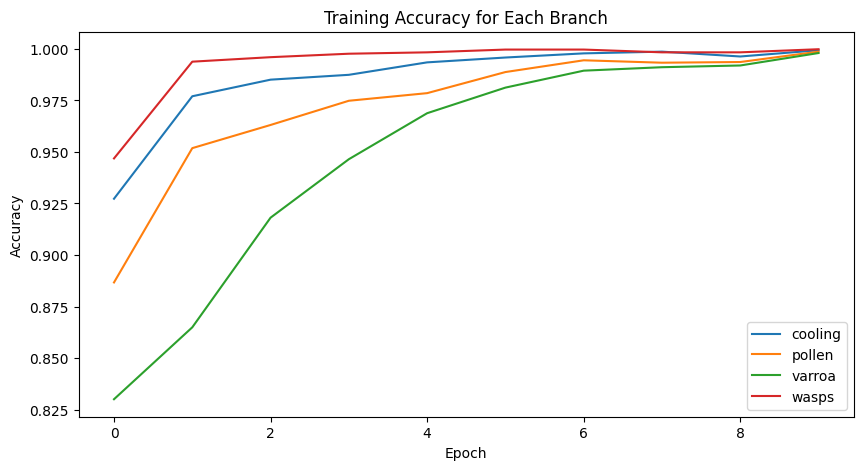

In [33]:
# --- Plotting Accuracy History ---
import matplotlib.pyplot as plt

def plot_accuracy(history_02):
  """Plots the training accuracy for each branch of a multi-output model."""

  plt.figure(figsize=(10, 5))

  for output_name in ['cooling', 'pollen', 'varroa', 'wasps']:
      plt.plot(history_02.history[f'{output_name}_accuracy'], label=output_name)

  plt.title('Training Accuracy for Each Branch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

# Plot the accuracy history
plot_accuracy(history_02)

In [ ]:
# Save the entire model to a HDF5 file
model.save('my_branched_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('my_branched_model.h5')